In [2]:
# Created by David Zamora (david.zamoracisneros@mail.mcgill.ca)

# This script is intended to test and determine the best distribution function (PDF)
# disfit computes the residual sum of squares (RSS) to determine so.
# For more info, or to install the library, please refer to:
# https://erdogant.github.io/distfit/pages/html/index.html


# General imports
# and loading libraries
import numpy as np
import matplotlib.pyplot as plt
from distfit import distfit
from scipy.stats import vonmises, semicircular, norm, beta

### Testing different PDF

From the [disfit documentation](https://erdogant.github.io/distfit/pages/html/index.html)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.000330339] [loc=0.016 scale=3.023]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.158892] [loc=-12.390 scale=12.406]
[distfit] >[pareto    ] [0.48 sec] [RSS: 0.18816] [loc=-110614585.503 scale=110614573.112]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.00393883] [loc=0.010 scale=2.567]
[distfit] >[t         ] [0.13 sec] [RSS: 0.000319352] [loc=0.016 scale=3.006]
[distfit] >[genextreme] [0.26 sec] [RSS: 0.000958387] [loc=-1.096 scale=3.016]
[distfit] >[gamma     ] [0.06 sec] [RSS: 0.000329139] [loc=-600.444 scale=0.015]
[distfit] >[lognorm   ] [0.43 sec] [RSS: 0.000348945] [loc=-173.875 scale=173.861]
[distfit] >[beta      ] [0.23 sec] [RSS: 0.000329132] [loc=-598.823 scale=95750.068]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.109489] [loc=-12.390 scale=22.623]
[distfit] >[loggamma  ] [0.17 sec] [RSS: 0.00035961] [loc=-587.048 scale=87.346]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\nRSS(df=183.9, loc=0.0156238, scale=3.00625)'}, xlabel='Values', ylabel='Frequency'>)

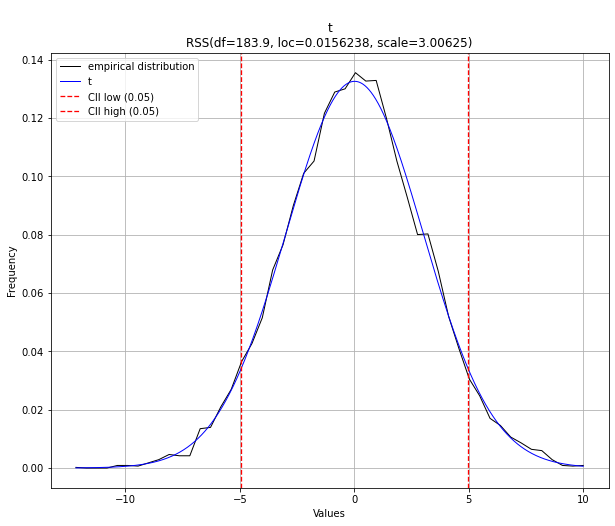

In [11]:
# Generating a normal distribution sample: mean 0, std dev of 3
data_2fit = np.random.normal(0,3,10000)

# Initialize disfit and test only for popular PDF
# Replace with 'full' to test the every PDF available in the library (it may be slow)
distr = distfit(distr='popular')

distr.fit_transform(data_2fit)

# Plot the PDF with the lowest RSS score
distr.plot()

### Fitting data to PDF

From the [scipy.stats documentation](https://docs.scipy.org/doc/scipy//reference/stats.html?highlight=scipy%20stats#module-scipy.stats)

In [6]:
# Returning estimates of shape, loc, and scale parameters from data.
# Default stimation method: Maximum Likelifood Estimation (MLE) 
# with Method of Moments (MM) also available.

a, b = 0., 3.
x = norm.rvs(a, b, size=1000)

a1, b1, loc1, scale1 = beta.fit(x)

#norm.fit(data_2fit)
#print(f'kappa: {kappa}')
#print(f'loc: {loc}')
#print(f'scale: {scale}')

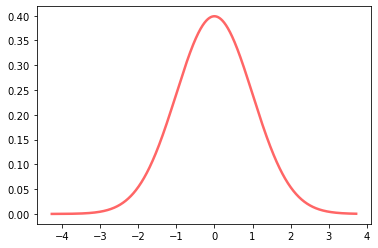

In [54]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
a, b  = -2.32, 0.99
x = np.linspace(norm.ppf(1e-5), norm.ppf(0.9999), 1000)

fig, ax = plt.subplots(1,1)

ax.plot(x, norm.pdf(x), 'r-', lw=2.5, alpha=0.6)

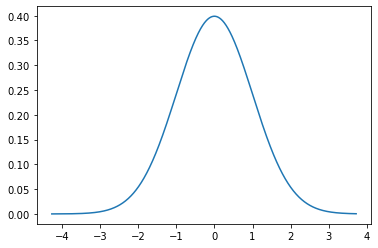

In [42]:
rv = norm()
plt.plot(x, rv.pdf(x))

loc: 9.147058110947627e-17
scale: 1.030693325907693


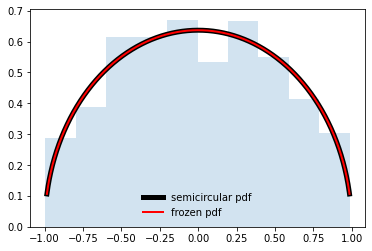

In [31]:
# For displaying the PDF
x = np.linspace(semicircular.ppf(0.001),
                semicircular.ppf(0.999), 1000)

# Sizing shape with a frozen object rv
rv = semicircular()

plt.figure()
plt.plot(x,semicircular.pdf(x), 'k-', lw=5, label='semicircular pdf')
plt.plot(x, rv.pdf(x), 'r-', lw=2, label='frozen pdf')
plt.hist(semicircular.rvs(size=len(x)),density=True,histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)

# For data fitting
loc1, scale1 = semicircular.fit(x)
print(f'loc: {loc1}')
print(f'scale: {scale1}')